## basic configurations

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('..\\data\\traindata.csv')
labels = pd.read_csv('..\\data\\trainlabel.txt', header=None, names=['label'])['label']
data.insert(0, 'label', labels)

## overall information of the data

In [3]:
data.head()

,label,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,77,Local-gov,177550,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,3818,0,14,United-States
1,0,40,Self-emp-inc,475322,Bachelors,13,Separated,Craft-repair,Own-child,White,Male,0,0,50,United-States
2,1,29,Self-emp-not-inc,341672,HS-grad,9,Married-spouse-absent,Transport-moving,Other-relative,Asian-Pac-Islander,Male,0,1564,50,India
3,0,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States
4,0,22,Private,306967,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           22792 non-null  int64 
 1   age             22792 non-null  int64 
 2   workclass       22792 non-null  object
 3   fnlwgt          22792 non-null  int64 
 4   education       22792 non-null  object
 5   education.num   22792 non-null  int64 
 6   marital.status  22792 non-null  object
 7   occupation      22792 non-null  object
 8   relationship    22792 non-null  object
 9   race            22792 non-null  object
 10  sex             22792 non-null  object
 11  capital.gain    22792 non-null  int64 
 12  capital.loss    22792 non-null  int64 
 13  hours.per.week  22792 non-null  int64 
 14  native.country  22792 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.6+ MB


In [5]:
data.describe()

,label,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,22792.000000,22792.000000,2.279200e+04,22792.000000,22792.000000,22792.000000,22792.000000
mean,0.240830,38.514918,1.896628e+05,10.075509,1048.223192,85.975123,40.455291
std,0.427597,13.640207,1.055492e+05,2.584257,7226.283048,400.471450,12.312654
min,0.000000,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,0.000000,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000
50%,0.000000,37.000000,1.781145e+05,10.000000,0.000000,0.000000,40.000000
75%,0.000000,47.000000,2.367405e+05,12.000000,0.000000,0.000000,45.000000
max,1.000000,90.000000,1.455435e+06,16.000000,99999.000000,3900.000000,99.000000


## Visualize the data

get a list of columns

In [6]:
col = data.columns.tolist()
col

['label',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country']

draw the gnneral distribution of the data

(-1.0999999551270816,
 1.0999999760705141,
 -1.0999999113043963,
 1.0999999957763997)

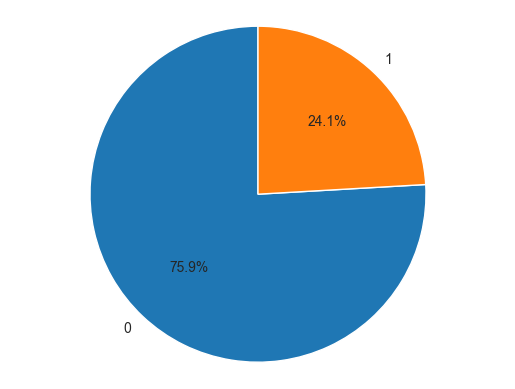

In [34]:
sns.set_style('whitegrid')
plt.pie(data['label'].value_counts(), labels=['0', '1'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
# plt.subplots(figsize=(15, 8))
# total = data['label'].value_counts()
# sns.countplot(data['label'])

### age

<Axes: xlabel='age'>

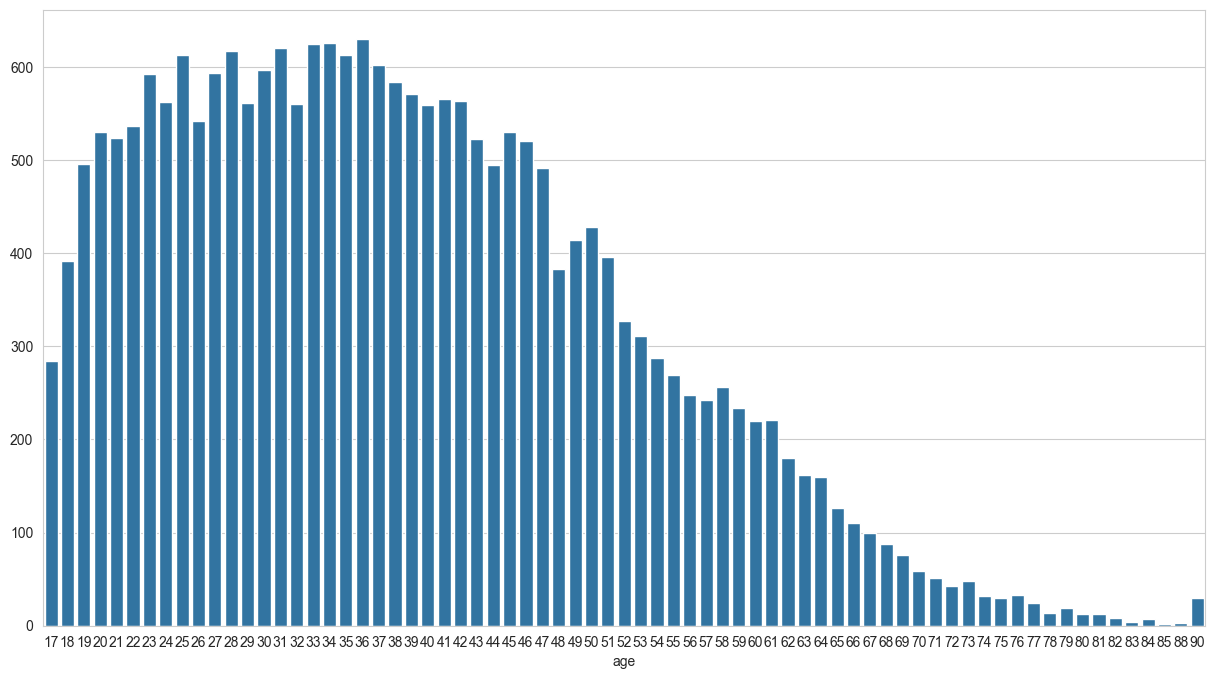

In [8]:
sns.set_style('whitegrid')
plt.subplots(figsize=(15, 8))
total = data['age'].value_counts()
sns.barplot(x=total.index, y=total.values)

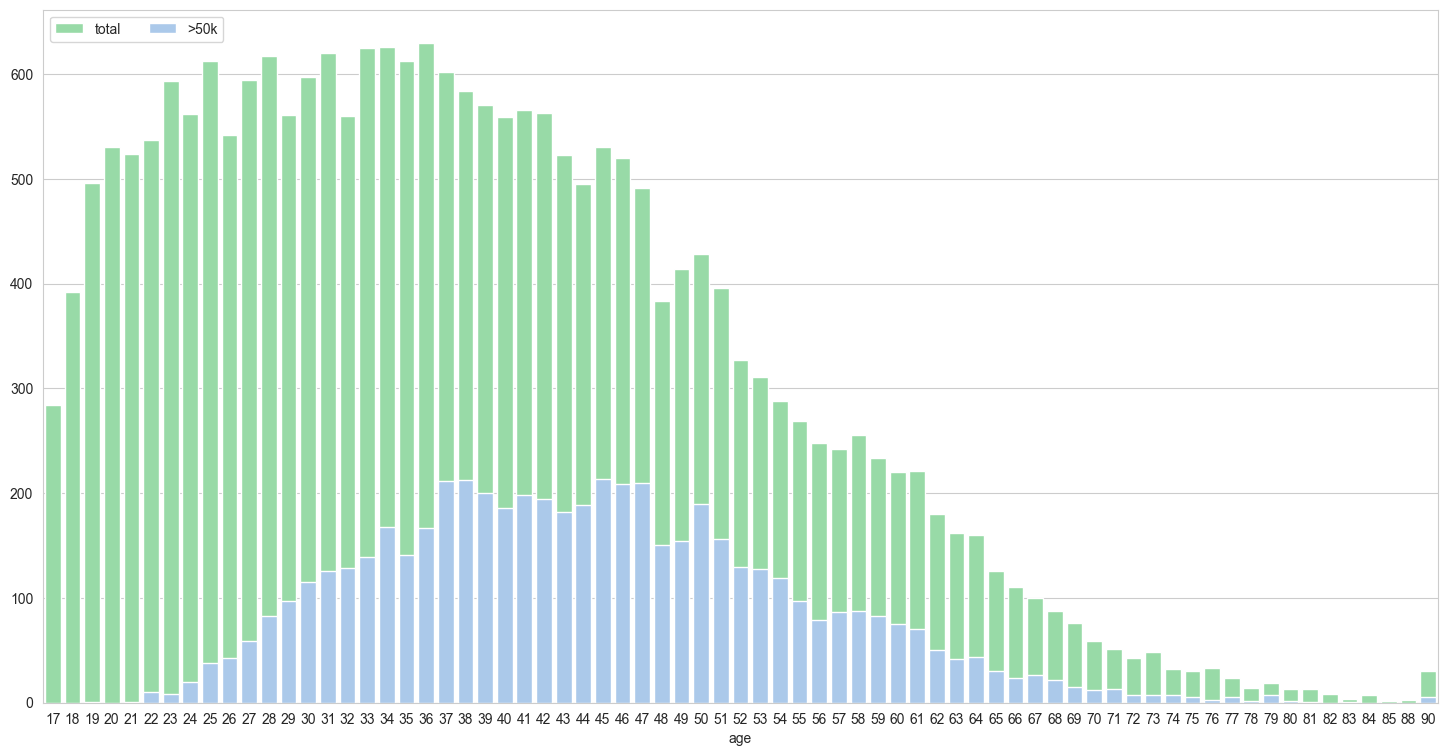

In [9]:
k = data['age'][data['label'] == 1].value_counts()
_, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes('pastel')
sns.barplot(x=total.index, y=total.values, label='total', color='g')
sns.barplot(x=k.index, y=k.values, label='>50k', color='b')
ax.legend(ncol=2, loc="upper left", frameon=True)

Text(0, 0.5, 'ratio')

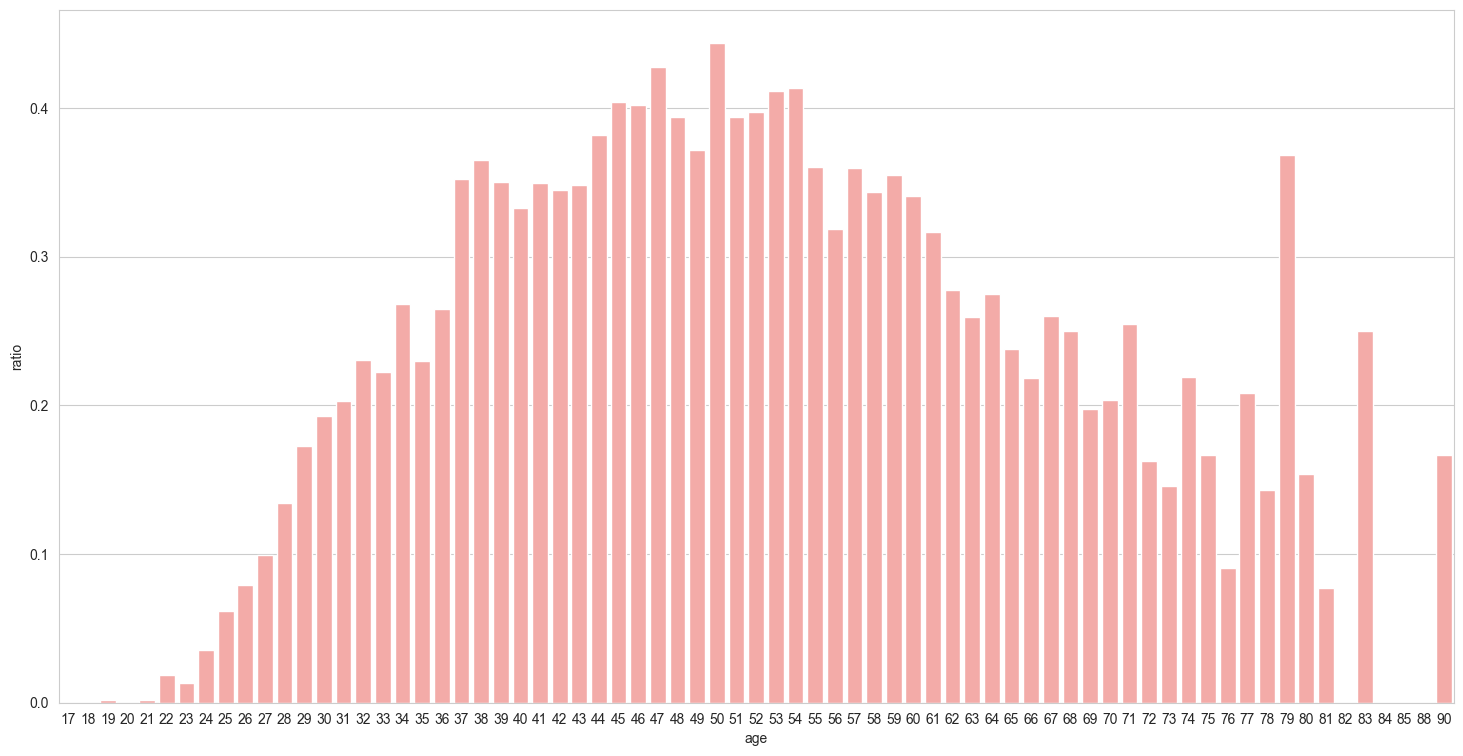

In [10]:
ratio = k / total
_, ax = plt.subplots(figsize=(18, 9))
sns.barplot(x=ratio.index, y=ratio.values, color='r')
ax.set_ylabel('ratio')

### education

<Axes: xlabel='education'>

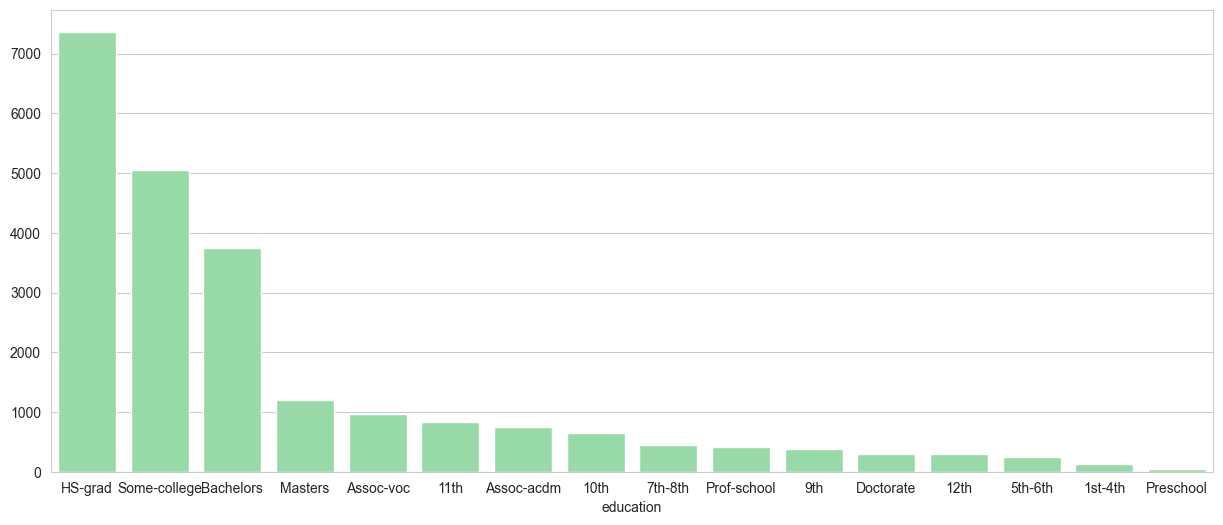

In [11]:
plt.subplots(figsize=(15, 6))
total = data['education'].value_counts()
sns.barplot(x=total.index, y=total.values, color='g')

In [12]:
edu_n=data.groupby(['education'])['education'].count()
edu_n

education
10th             641
11th             840
12th             292
1st-4th          121
5th-6th          239
7th-8th          451
9th              374
Assoc-acdm       752
Assoc-voc        970
Bachelors       3742
Doctorate        297
HS-grad         7367
Masters         1193
Preschool         39
Prof-school      414
Some-college    5060
Name: education, dtype: int64

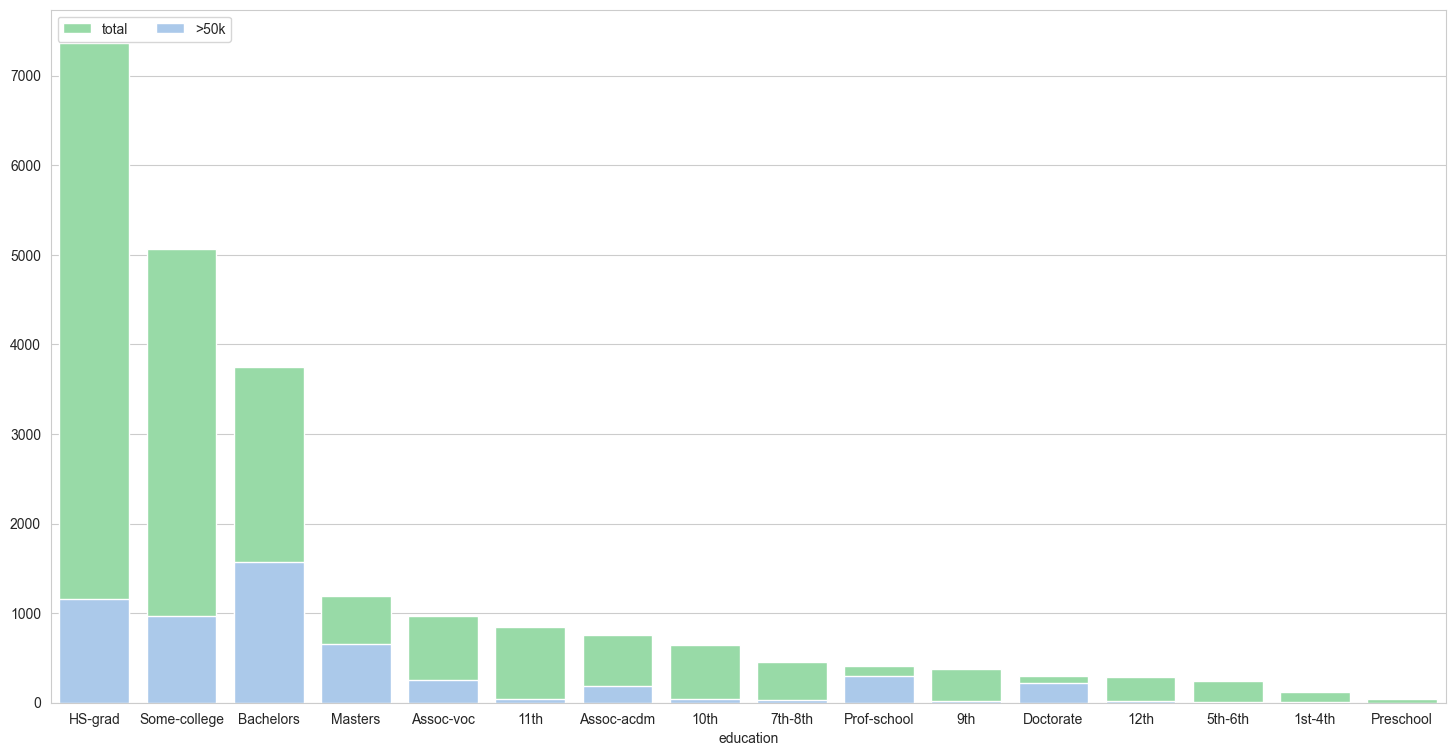

In [13]:
k = data['education'][data['label'] == 1].value_counts()
_, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes('pastel')
sns.barplot(x=total.index, y=total.values, label='total', color='g')
sns.barplot(x=k.index, y=k.values, label='>50k', color='b')
ax.legend(ncol=2, loc="upper left", frameon=True)

Text(0, 0.5, 'ratio')

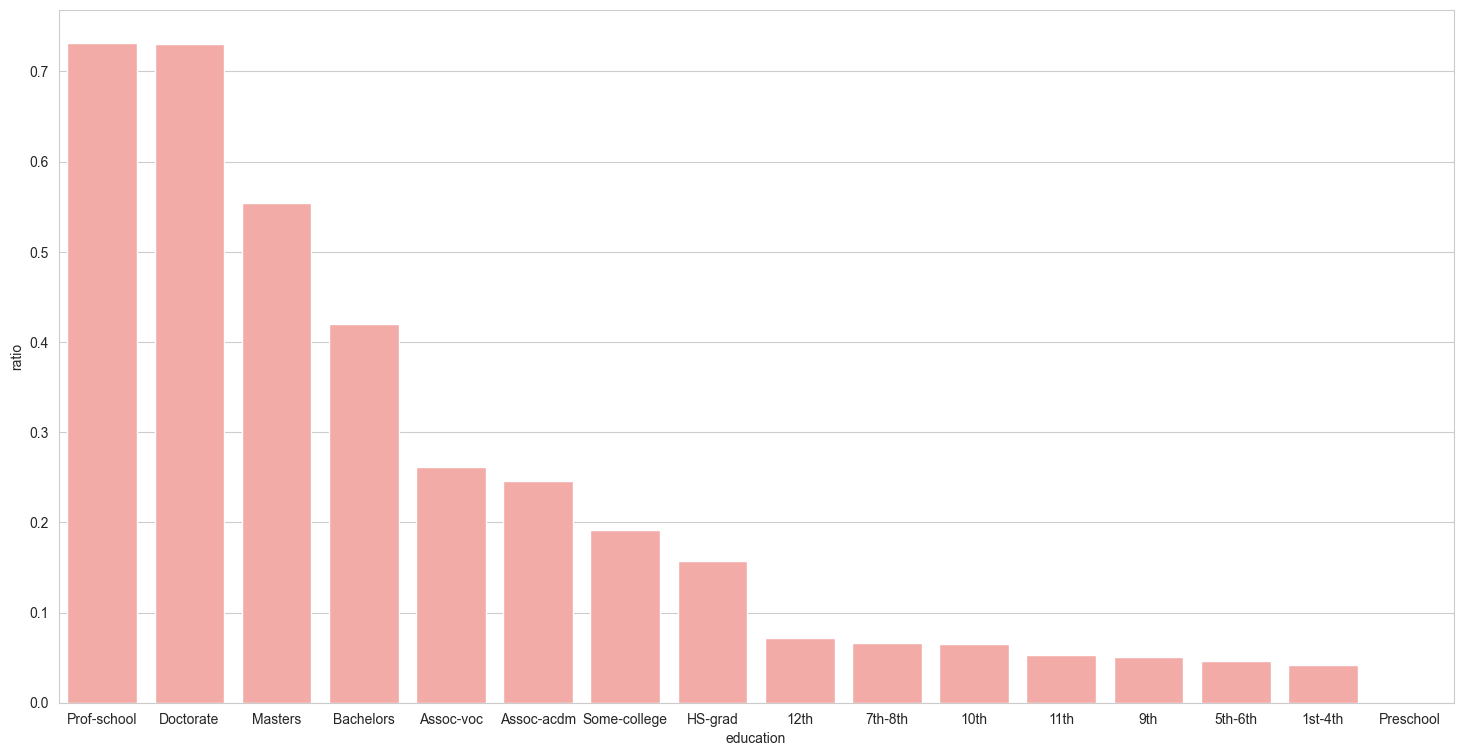

In [14]:
ratio = k / total
_, ax = plt.subplots(figsize=(18, 9))
sorted_ratio = ratio.sort_values(ascending=False)
# sns.barplot(x=ratio.index, y=ratio.values, color='r')
sns.barplot(x=sorted_ratio.index, y=sorted_ratio.values, color='r')
ax.set_ylabel('ratio')

### marriage

<Axes: xlabel='marital.status'>

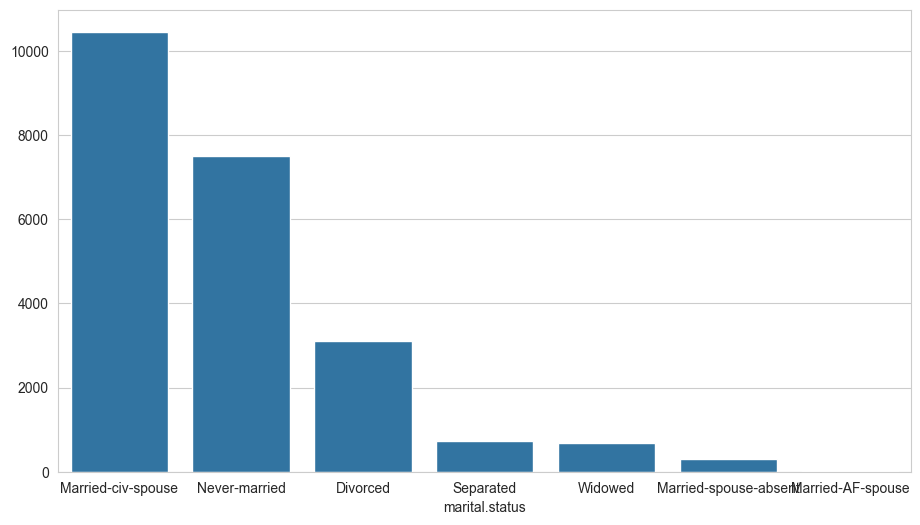

In [15]:
f,ax=plt.subplots(figsize=(11, 6))
s = data['marital.status'].value_counts()
sns.barplot(x = s.index, y = s.values)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

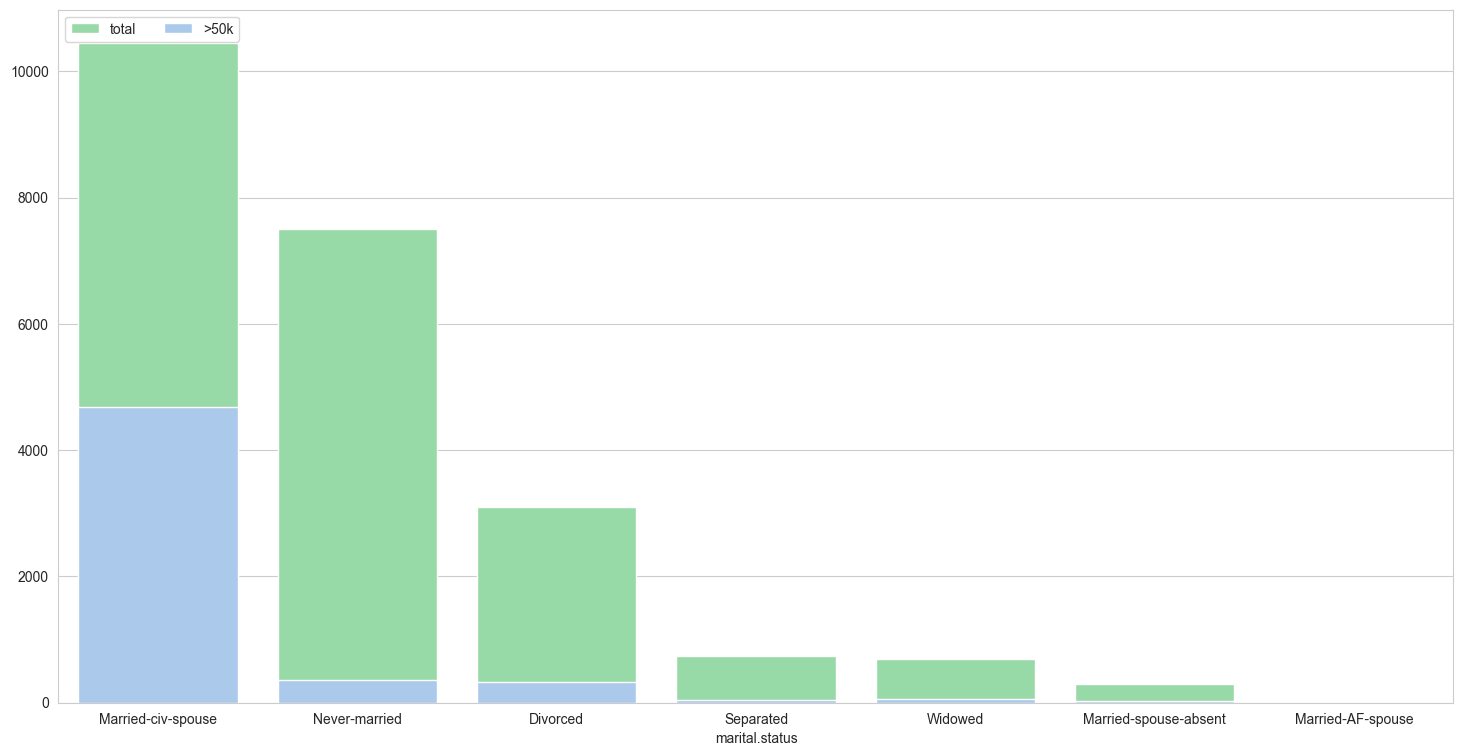

In [16]:
k = data['marital.status'][data['label'] == 1].value_counts()
_, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes('pastel')
sns.barplot(x=s.index, y=s.values, label='total', color='g')
sns.barplot(x=k.index, y=k.values, label='>50k', color='b')
ax.legend(ncol=2, loc="upper left", frameon=True)

Text(0, 0.5, 'ratio')

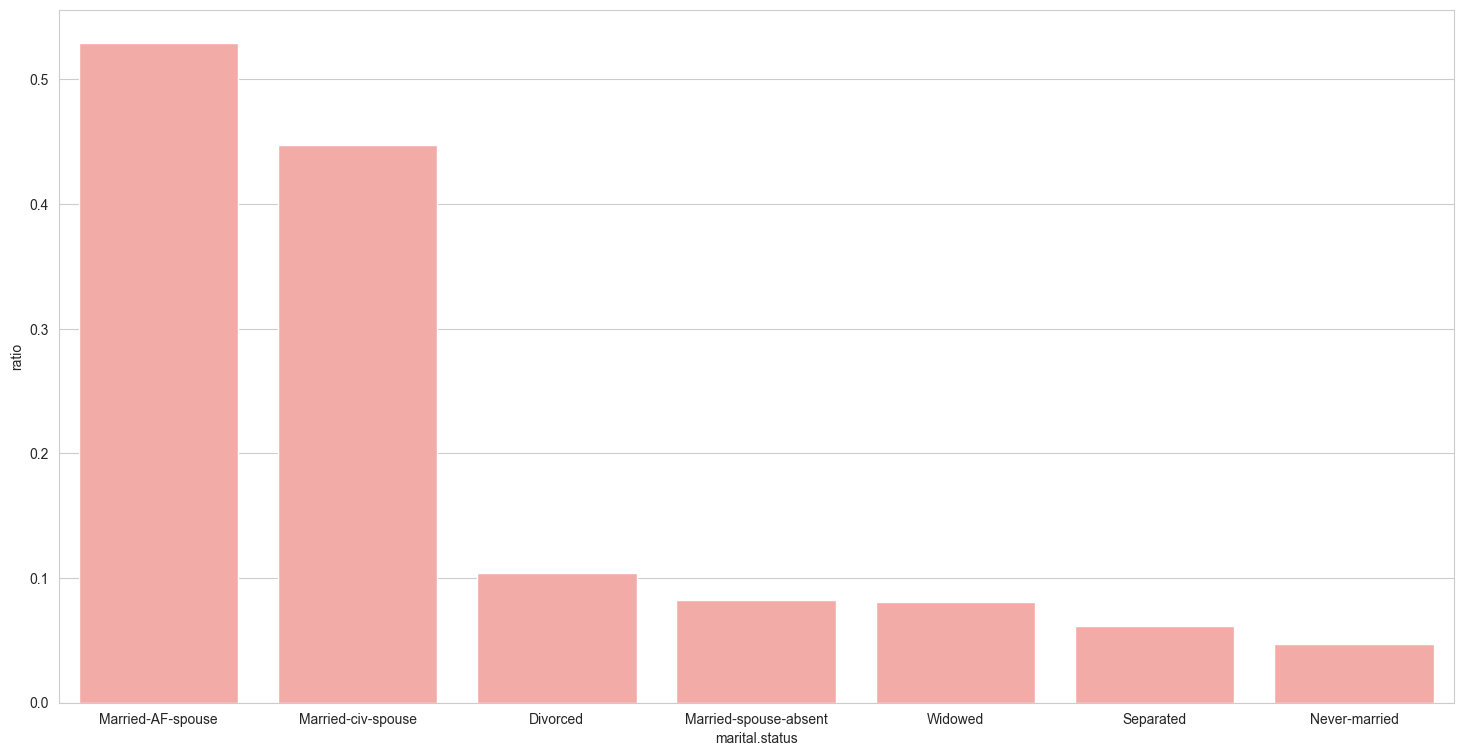

In [17]:
ratio = k / s
_, ax = plt.subplots(figsize=(18, 9))
sorted_ratio = ratio.sort_values(ascending=False)
sns.barplot(x=sorted_ratio.index, y=sorted_ratio.values, color='r')
ax.set_ylabel('ratio')

### gender

In [18]:
x = data['sex'].value_counts()
x

sex
Male      15258
Female     7534
Name: count, dtype: int64

In [19]:
y = data['sex'][data['label'] == 1].value_counts()
y

sex
Male      4652
Female     837
Name: count, dtype: int64

In [20]:
ratio = y / x
ratio

sex
Male      0.304889
Female    0.111096
Name: count, dtype: float64

### race

([<matplotlib.patches.Wedge at 0x234d8ae7b50>,
 [Text(0.634781382025259, 0.8983610616194929, 'White'),
  Text(-0.814845702953838, 0.7389360462026913, 'Black'),
  Text(-0.8189508032981215, -0.7343838109444963, 'Asian-Pac-Islander'),
  Text(0.5490977528684666, -0.953148287411146, 'Amer-Indian-Eskimo'),
  Text(1.0407183571989036, -0.3562377029305229, 'Other')],
 [Text(0.34624439019559583, 0.49001512451972334, '30.4%'),
  Text(-0.4444612925202752, 0.40305602520146794, '15.7%'),
  Text(-0.4467004381626117, -0.40057298778790706, '31.0%'),
  Text(0.29950786520098177, -0.5198990658606251, '12.4%'),
  Text(0.5676645584721292, -0.19431147432573978, '10.5%')])

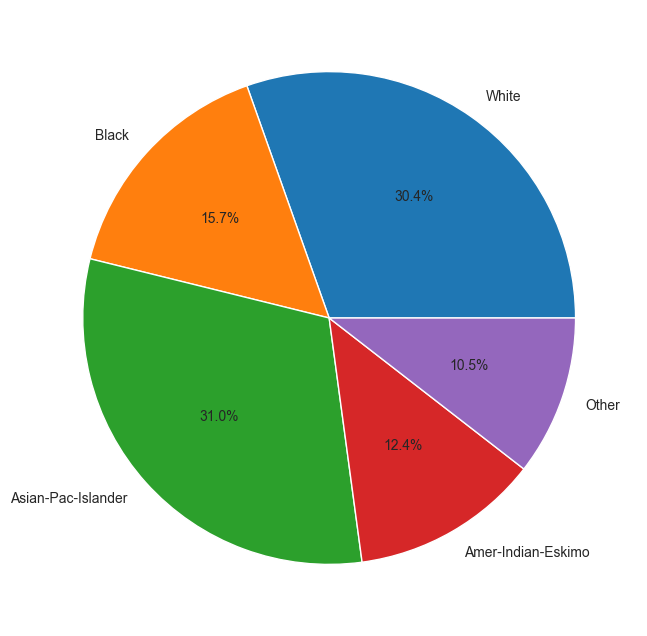

In [21]:
plt.subplots(figsize=(8, 8))
s = data['race'].value_counts()
k = data['race'][data['label'] == 1].value_counts()
ratio = k / s
plt.pie(ratio.values, labels=ratio.index, autopct='%1.1f%%')

### family

([<matplotlib.patches.Wedge at 0x234daf1fa00>,
 [Text(0.37235738299657345, 1.0350603747260076, 'Husband'),
  Text(-1.009744637014983, 0.43636655236106353, 'Not-in-family'),
  Text(-1.0994121163256645, 0.035958288006016054, 'Other-relative'),
  Text(-1.094647533504172, -0.10838255114746437, 'Own-child'),
  Text(-1.045842293995788, -0.34090159297021116, 'Unmarried'),
  Text(0.26819934714327376, -1.0668032199951039, 'Wife')],
 [Text(0.20310402708904005, 0.5645783862141859, '39.0%'),
  Text(-0.5507698020081724, 0.238018119469671, '9.0%'),
  Text(-0.5996793361776351, 0.019613611639645118, '2.9%'),
  Text(-0.5970804728204574, -0.0591177551713442, '1.2%'),
  Text(-0.5704594330886117, -0.18594632343829698, '5.7%'),
  Text(0.14629055298724022, -0.5818926654518747, '42.2%')])

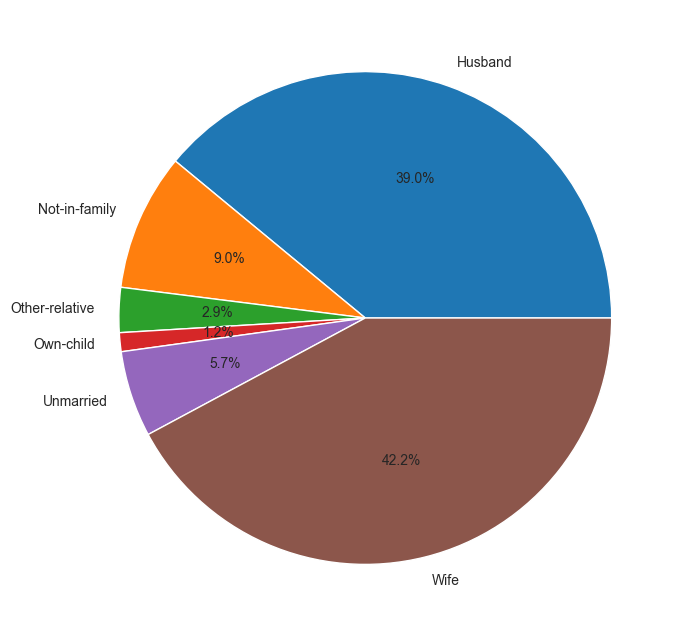

In [22]:
plt.subplots(figsize=(8, 8))
s=data['relationship'].value_counts()
k=data['relationship'][data['label']==1].value_counts()
ratio=k/s
plt.pie(ratio.values,labels=ratio.index,autopct='%1.1f%%')

### occupation

<Axes: ylabel='occupation'>

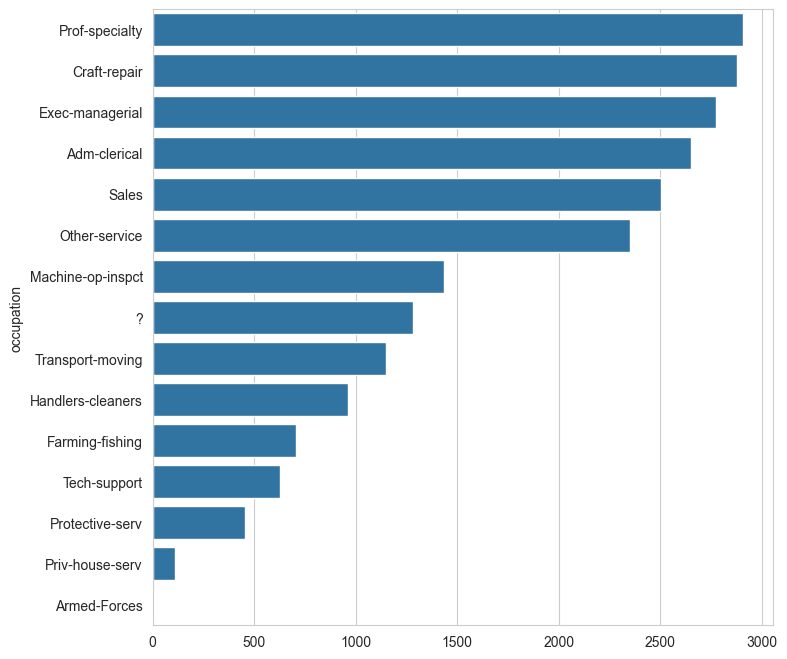

In [23]:
plt.subplots(figsize=(8, 8))
s=data['occupation'].value_counts()
sns.barplot(y=s.index,x=s.values)

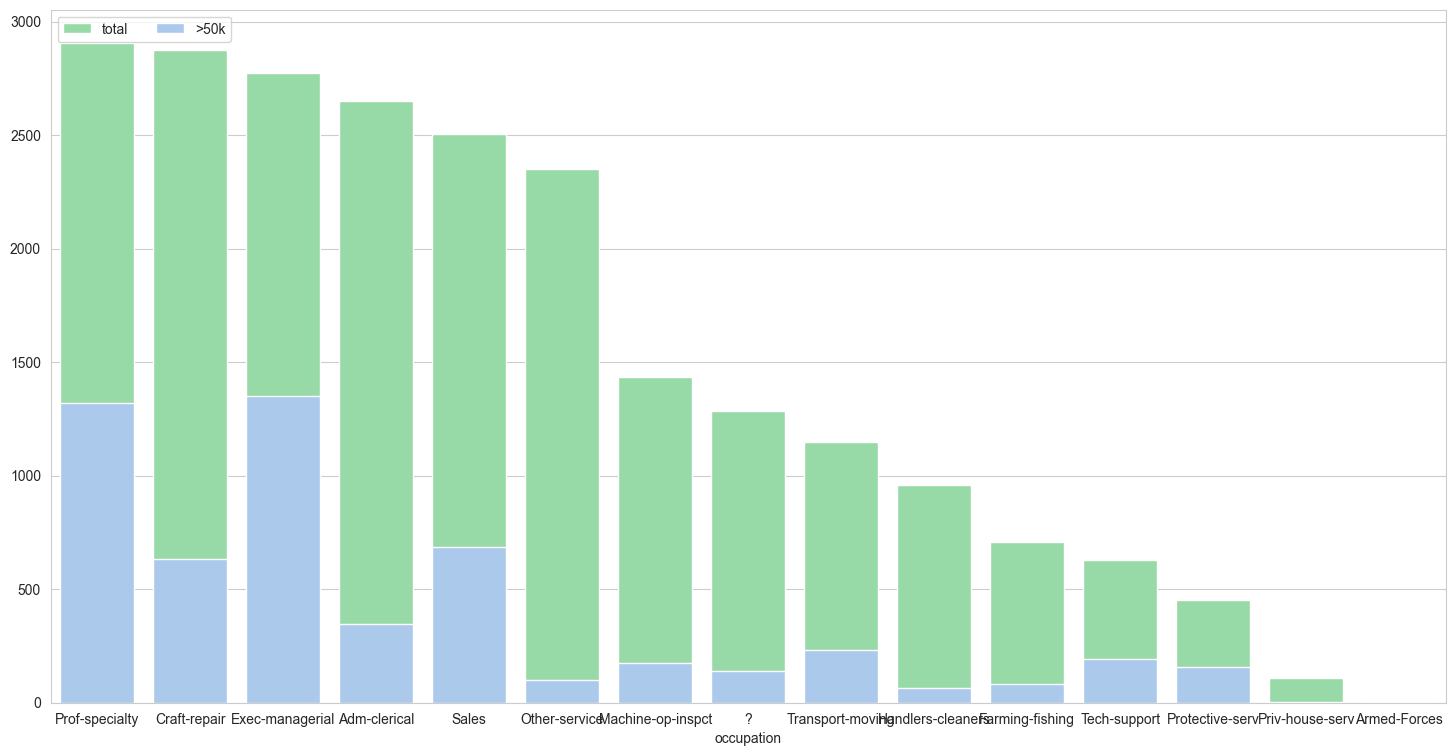

In [24]:
k = data['occupation'][data['label'] == 1].value_counts()
_, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes('pastel')
sns.barplot(x=s.index, y=s.values, label='total', color='g')
sns.barplot(x=k.index, y=k.values, label='>50k', color='b')
ax.legend(ncol=2, loc="upper left", frameon=True)

Text(0, 0.5, 'ratio')

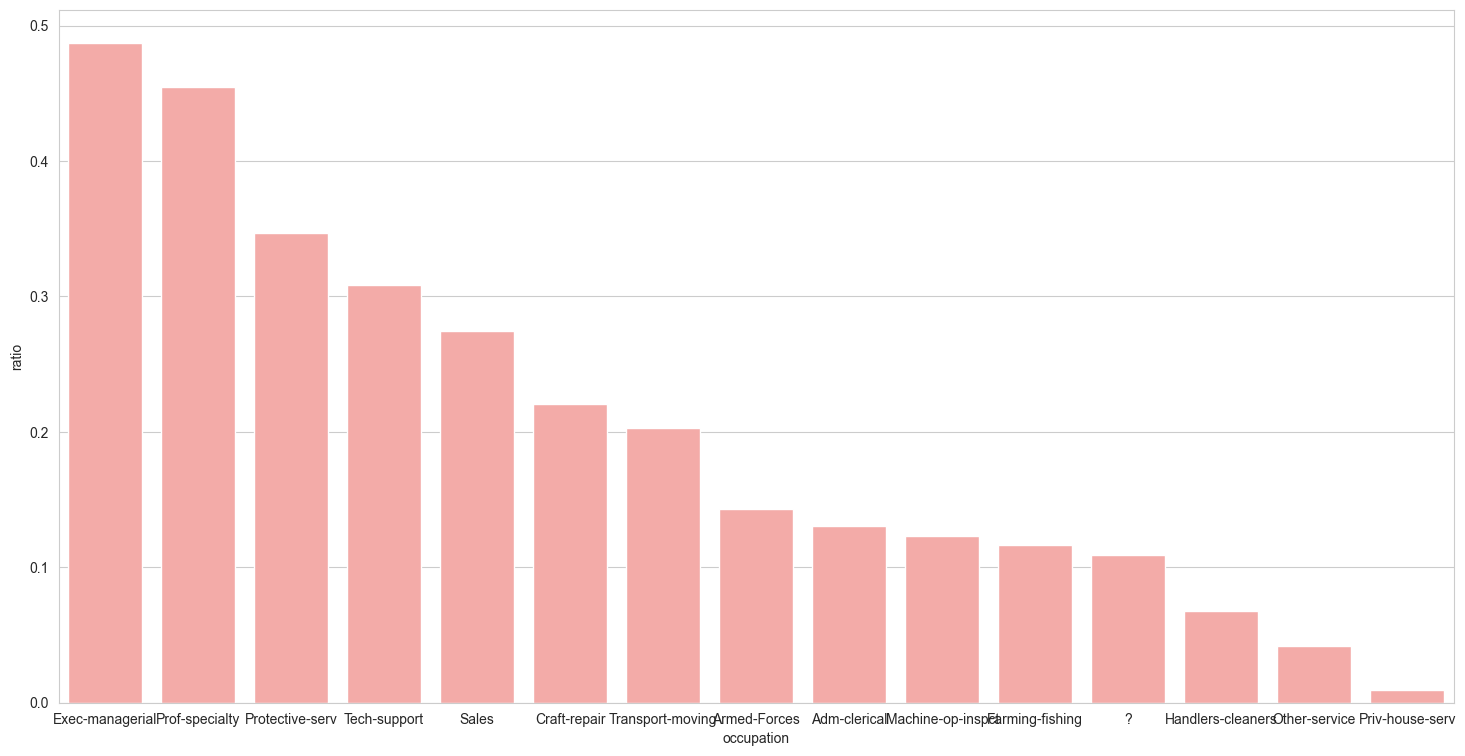

In [25]:
ratio = k / s
_, ax = plt.subplots(figsize=(18, 9))
sorted_ratio = ratio.sort_values(ascending=False)
sns.barplot(x=sorted_ratio.index, y=sorted_ratio.values, color='r')
ax.set_ylabel('ratio')

### working time

<Axes: xlabel='hours.per.week'>

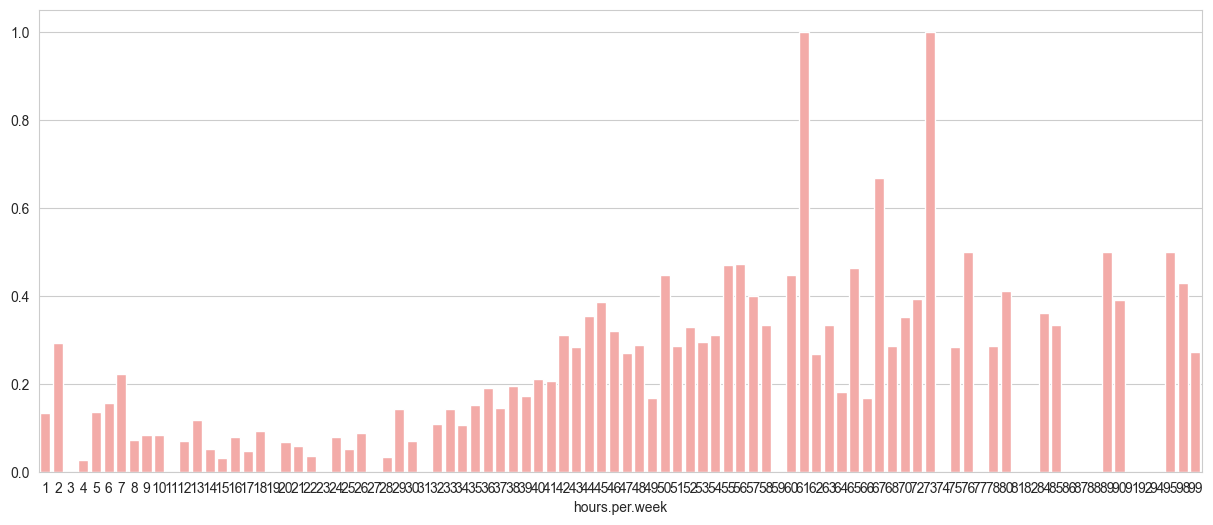

In [26]:
s = data['hours.per.week'].value_counts()
k = data['hours.per.week'][data['label'] == 1].value_counts()
ratio = k / s
plt.subplots(figsize=(15, 6))
sns.barplot(x=ratio.index, y=ratio.values, color='r')

### country

<Axes: ylabel='native.country'>

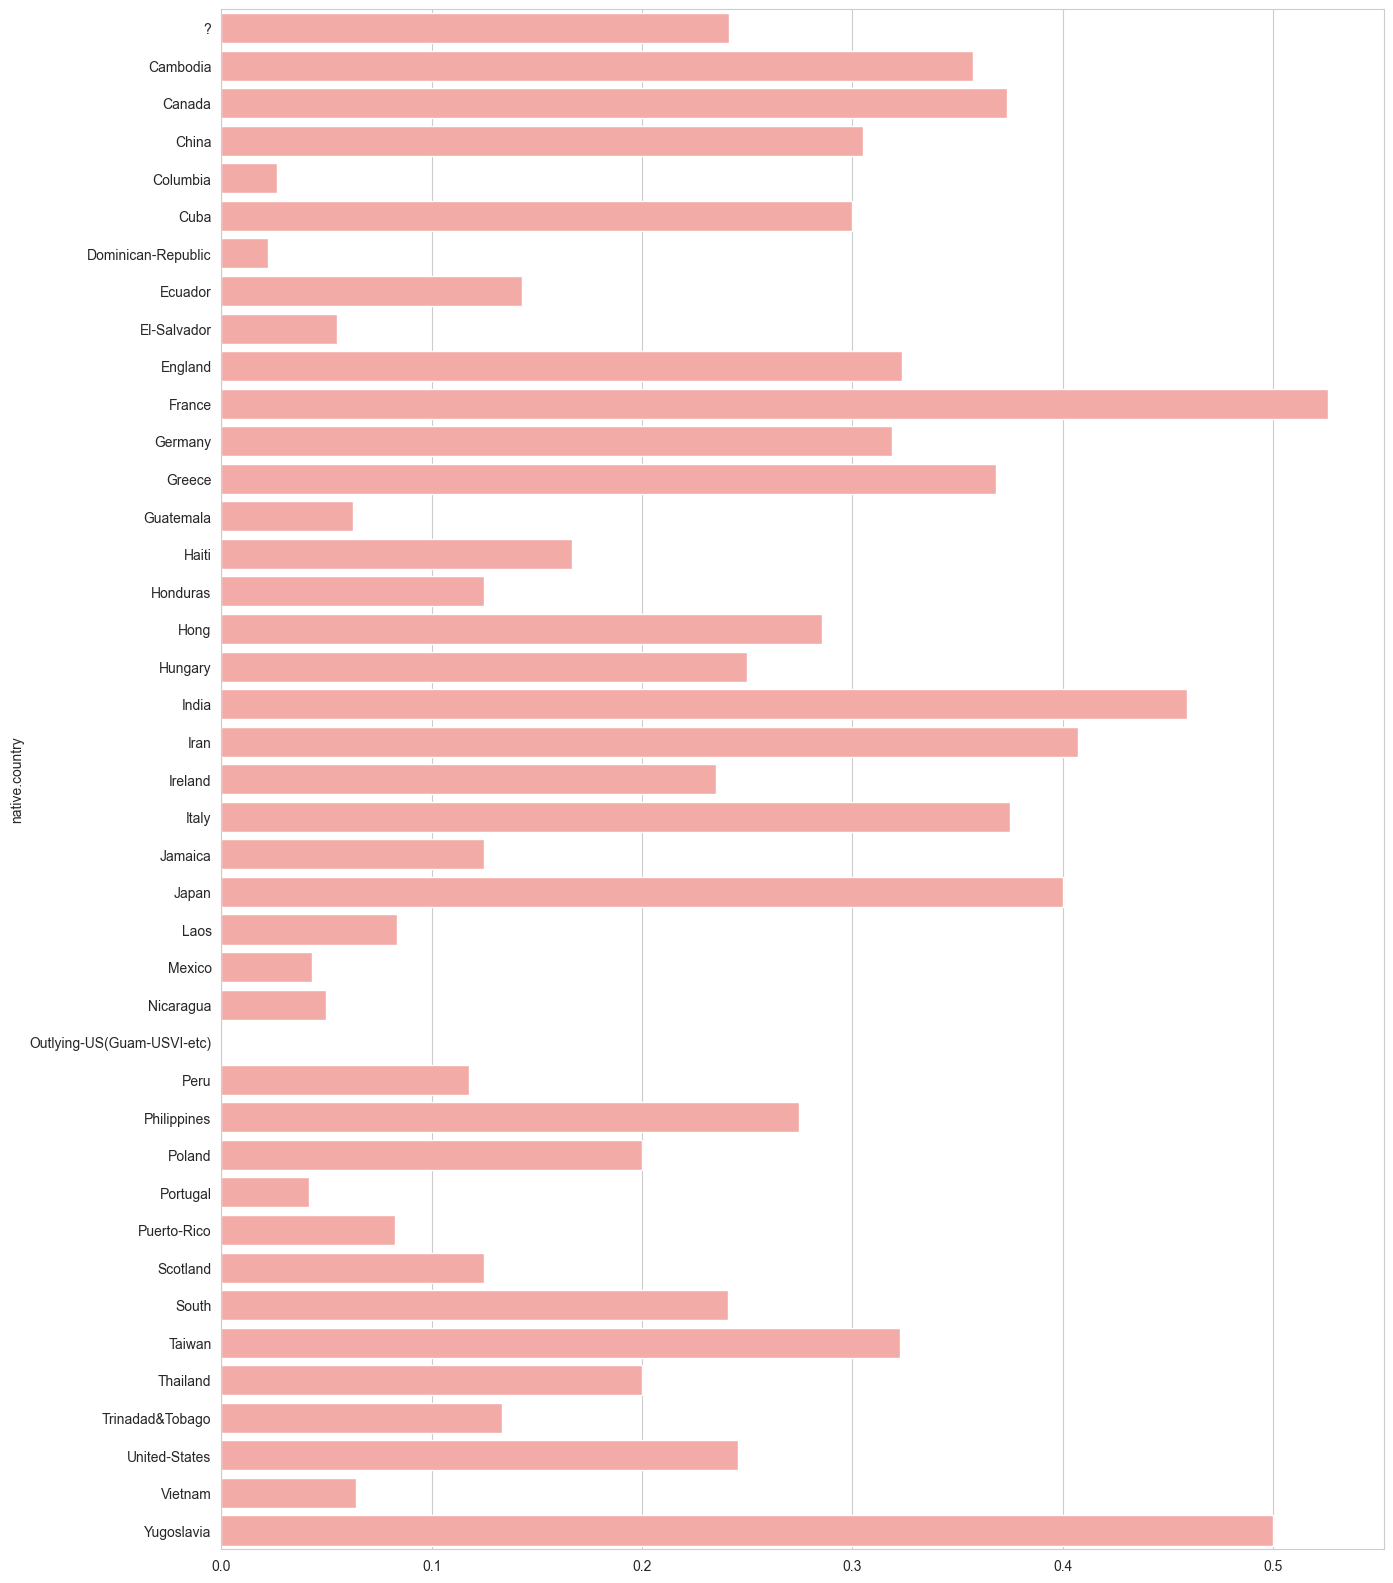

In [27]:
s = data['native.country'].value_counts()
k = data['native.country'][data['label'] == 1].value_counts()
ratio = k / s
plt.subplots(figsize=(15, 20))
sns.barplot(y=ratio.index, x=ratio.values, color='r')

### gain/loss

C:\Users\祝超\AppData\Local\Temp\ipykernel_26308\1820947050.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital.loss'][data['capital.loss']!=0])


<Axes: xlabel='capital.loss', ylabel='Density'>

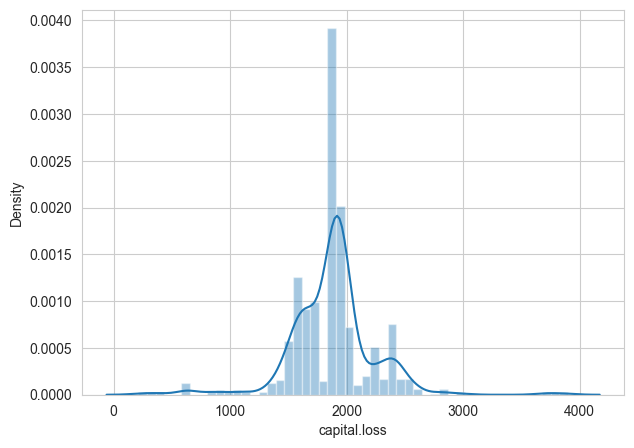

In [28]:
plt.subplots(figsize=(7,5))
sns.distplot(data['capital.loss'][data['capital.loss']!=0])

C:\Users\祝超\AppData\Local\Temp\ipykernel_26308\3182948933.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital.gain'][data['capital.gain']!=0])


<Axes: xlabel='capital.gain', ylabel='Density'>

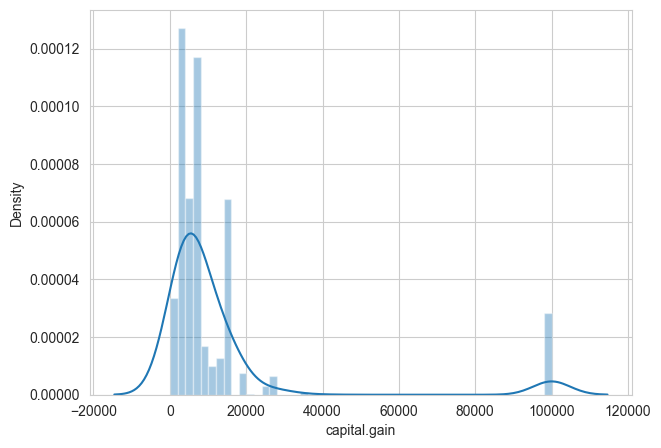

In [29]:
plt.subplots(figsize=(7,5))
sns.distplot(data['capital.gain'][data['capital.gain']!=0])

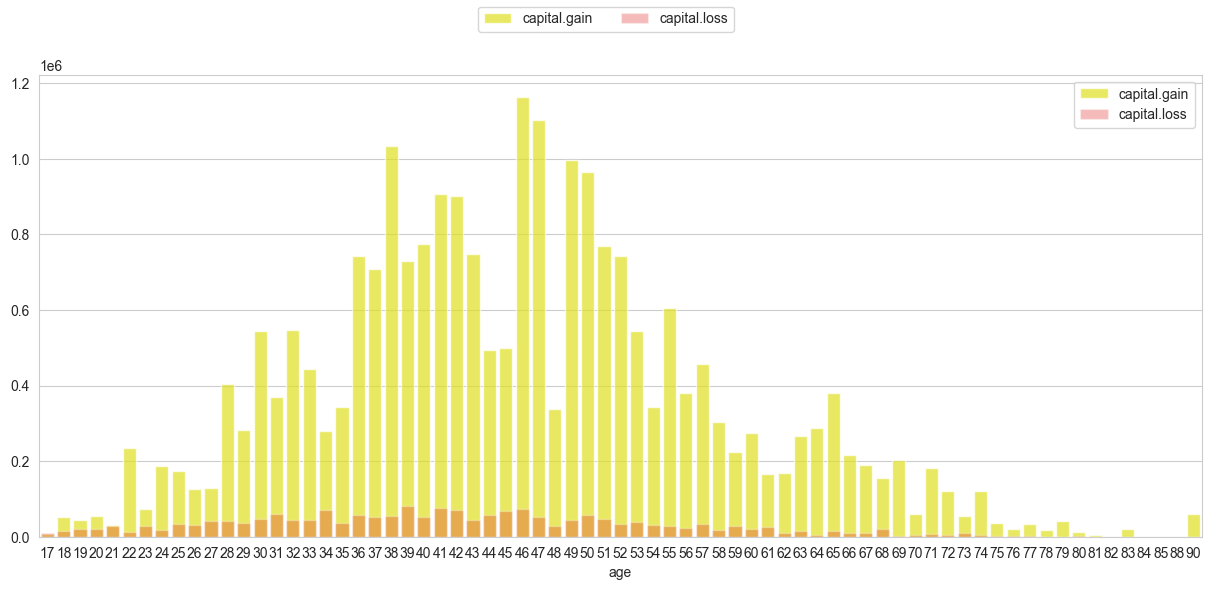

In [30]:
gain_age=data.groupby(['age'])['capital.gain'].sum()
loss_age=data.groupby(['age'])['capital.loss'].sum()
fig =plt.figure(figsize=(15,6))
sns.barplot(x=gain_age.index, y=gain_age.values,color='yellow',alpha=0.7,label='capital.gain')
sns.barplot(x=loss_age.index, y=loss_age.values,color='red',alpha = 0.3,label='capital.loss')
fig.legend(ncol=2, loc="upper center", frameon=True)